<a href="https://colab.research.google.com/github/bwilder95/MIT_Intro_to_ML/blob/main/MIT_6_036_hw05_Colab_Notebook_(OLL)_WILDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Spring 2019: Homework 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Setup
First, download the code distribution for this homework that contains test cases and helper functions.

Run the next code block to download and import the code for this lab.

In [3]:
!rm -rf code_and_data_for_hw05*
!wget --quiet https://introml_oll.odl.mit.edu/6.036/static/homework/hw05/code_and_data_for_hw05.zip
!unzip code_and_data_for_hw05.zip
!mv code_and_data_for_hw05/* .
  
import code_for_hw5 as hw5

Archive:  code_and_data_for_hw05.zip
   creating: code_and_data_for_hw05/
  inflating: code_and_data_for_hw05/auto-mpg-regression.tsv  
  inflating: code_and_data_for_hw05/auto.py  
  inflating: code_and_data_for_hw05/code_for_hw5.py  


# Warm up exercises


## 2) Linear Regression

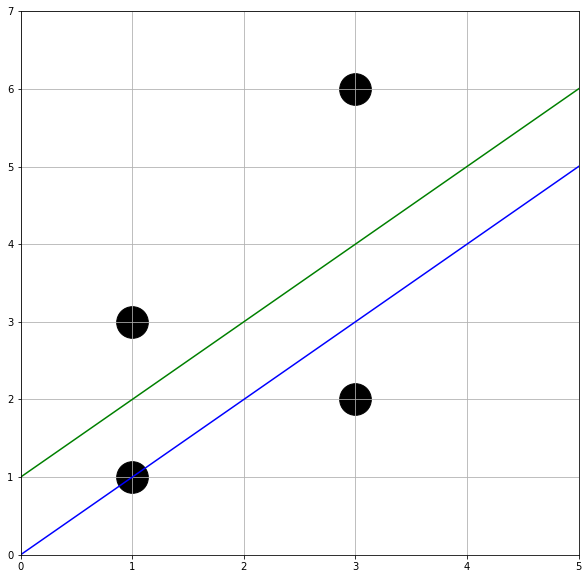

In [4]:
data = np.array([[1,3], [1,1], [3,2],[3,6]]).T
x,y = data
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
ax.scatter(x, y, color='black',marker='o',s=1000)
xL = np.linspace(-25,25,100)
yBlue = xL
yGreen = xL + 1 
ax.plot(xL,yBlue,color='blue')
ax.plot(xL,yGreen,color='green')
plt.ylim(0,7)
plt.xlim(0,5)
plt.show()

In [5]:
# Ex2.1: What is the squared error of each of the points with respect to the blue line?
def L(x,y,theta,theta_0):
  return (y - theta.T*x - theta_0)**2

print(L(1,3,np.array([1]),0))
print(L(1,1,np.array([1]),0))
print(L(3,2,np.array([1]),0))
print(L(3,6,np.array([1]),0))

[4]
[0]
[1]
[9]


In [6]:
# Ex2.2: What is the gradient contribution from each point to the parameters of the blue (lower) line?
def grad_L(x,y,theta,theta_0):
  return (-2*(y-theta.T*x-theta_0)*x,-2*(y-theta.T*x-theta_0))

print(grad_L(1,3,np.array([1]),0))
print(grad_L(1,1,np.array([1]),0))
print(grad_L(3,2,np.array([1]),0))
print(grad_L(3,6,np.array([1]),0))

(array([-4]), array([-4]))
(array([0]), array([0]))
(array([6]), array([2]))
(array([-18]), array([-6]))


In [7]:
# Ex2.3: What is the squared error of each of the points with respect to the green line?
# Ex2.4: What is the gradient contribution from each point to the parameters of the green line?
print(L(1,3,np.array([1]),1))
print(L(1,1,np.array([1]),1))
print(L(3,2,np.array([1]),1))
print(L(3,6,np.array([1]),1))
print('')
print(grad_L(1,3,np.array([1]),1))
print(grad_L(1,1,np.array([1]),1))
print(grad_L(3,2,np.array([1]),1))
print(grad_L(3,6,np.array([1]),1))

[1]
[1]
[4]
[4]

(array([-2]), array([-2]))
(array([2]), array([2]))
(array([12]), array([4]))
(array([-12]), array([-4]))


# Start of HW 5

## 3) Minimizing empirical risk

In [9]:
# 3E) Now implement θ∗\theta^*θ∗ as found in 3D), using symbols X and Y for the data matrix and outputs, and np.dot, np.transpose, np.linalg.inv. 

# th* = (XX^T)^−1 @ XY^T

In [ ]:
# Enter an expression to compute and set th to the optimal theta
th = np.linalg.inv((X@X.T))@(X@Y.T)

## 6) Linear Regression  - going downhill

We will now write some general Python code to compute the gradient of the squared-loss objective, following the structure of the expression, and the rules of calculus.  Note that this style of writing the gradient functions maps directly into the chain-rule steps required to compute the gradient, but produces code that is inefficient, because of duplicated computations. It is straightforward to implement more efficient versions if you want to use them for larger problems.

### 6.1) Some basic functions

We start by defining some basic functions for computing the mean squared loss.  Note that we want these to work for any
value of $n$. That is, `x` could be a single feature vector or a full data matrix, and similarly for `y`.

In [14]:
# In all the following definitions:
# x is d by n : input data
# y is 1 by n : output regression values
# th is d by 1 : weights
# th0 is 1 by 1 or scalar
def lin_reg(x, th, th0):
    """ Returns the predicted y

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 0.]])
    >>> lin_reg(X, th, th0).tolist()
    [[1.05, 2.05, 3.05, 4.05]]
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> lin_reg(X, th, th0).tolist()
    [[3.05, 4.05, 5.05, 6.05]]
    """
    return np.dot(th.T, x) + th0
def square_loss(x, y, th, th0):
    """ Returns the squared loss between y_pred and y

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> square_loss(X, Y, th, th0).tolist()
    [[4.2025, 3.4224999999999985, 5.0625, 3.8025000000000007]]
    """
    return (y - lin_reg(x, th, th0))**2
def mean_square_loss(x, y, th, th0):
    """ Return the mean squared loss between y_pred and y

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> mean_square_loss(X, Y, th, th0).tolist()
    [[4.1225]]
    """
    # the axis=1 and keepdims=True are important when x is a full matrix
    return np.mean(square_loss(x, y, th, th0), axis = 1, keepdims = True)

### 6.2) Gradients with respect to $\theta$

Now, let's compute the gradients with respect to $\theta$. Make sure that they work both for data matrices and label vectors.  You can write one function at a time, some of the checks will apply to each function independently.

In [17]:
# Write a function that returns the gradient of lin_reg(x, th, th0)
# with respect to th
def d_lin_reg_th(x, th, th0):
    """ Returns the gradient of lin_reg(x, th, th0) with respect to th

    Note that for array (rather than vector) x, we get a d x n 
    result. That is to say, this function produces the gradient for
    each data point i ... n, with respect to each theta, j ... d.

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> th = np.array([[ 1.  ], [ 0.05]]); th0 = np.array([[ 2.]])
    >>> d_lin_reg_th(X[:,0:1], th, th0).tolist()
    [[1.0], [1.0]]

    >>> d_lin_reg_th(X, th, th0).tolist()
    [[1.0, 2.0, 3.0, 4.0], [1.0, 1.0, 1.0, 1.0]]
    """
    return x

# Write a function that returns the gradient of square_loss(x, y, th, th0) with
# respect to th.  It should be a one-line expression that uses lin_reg and
# d_lin_reg_th.
def d_square_loss_th(x, y, th, th0):
    """Returns the gradient of square_loss(x, y, th, th0) with respect to
       th.

       Note: should be a one-line expression that uses lin_reg and
       d_lin_reg_th (i.e., uses the chain rule).

       Should work with X, Y as vectors, or as arrays. As in the
       discussion of d_lin_reg_th, this should give us back an n x d
       array -- so we know the sensitivity of square loss for each
       data point i ... n, with respect to each element of theta.

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_square_loss_th(X[:,0:1], Y[:,0:1], th, th0).tolist()
    [[4.1], [4.1]]

    >>> d_square_loss_th(X, Y, th, th0).tolist()
    [[4.1, 7.399999999999999, 13.5, 15.600000000000001], [4.1, 3.6999999999999993, 4.5, 3.9000000000000004]]

    """
    return -2 * (y - lin_reg(x, th, th0)) * d_lin_reg_th(x, th, th0)

# Write a function that returns the gradient of mean_square_loss(x, y, th, th0) with
# respect to th.  It should be a one-line expression that uses d_square_loss_th.
def d_mean_square_loss_th(x, y, th, th0):
    """ Returns the gradient of mean_square_loss(x, y, th, th0) with
        respect to th.  

        Note: It should be a one-line expression that uses d_square_loss_th.

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_mean_square_loss_th(X[:,0:1], Y[:,0:1], th, th0).tolist()
    [[4.1], [4.1]]

    >>> d_mean_square_loss_th(X, Y, th, th0).tolist()
    [[10.15], [4.05]]
    """
    # print("X =", repr(X))
    # print("Y =", repr(Y))
    # print("th =", repr(th), "th0 =", repr(th0))
    return np.mean(d_square_loss_th(x, y, th, th0), axis = 1, keepdims = True)

### 6.3) Gradients with respect to $\theta_0$

Now, let's compute the gradients with respect to $\theta_0$. Make sure that they work both for data matrices and label vectors.  You can write one function at a time, some of the checks will apply to each function independently.

In [22]:
# Write a function that returns the gradient of lin_reg(x, th, th0)
# with respect to th0. Hint: Think carefully about what the dimensions of the returned value should be!
def d_lin_reg_th0(x, th, th0):
    """ Returns the gradient of lin_reg(x, th, th0) with respect to th0.

    >>> x = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_lin_reg_th0(x, th, th0).tolist()
    [[1.0, 1.0, 1.0, 1.0]]
    """
    return np.ones((1, x.shape[1]))
    
# Write a function that returns the gradient of square_loss(x, y, th, th0) with
# respect to th0.  It should be a one-line expression that uses lin_reg and
# d_lin_reg_th0.
def d_square_loss_th0(x, y, th, th0):
    """ Returns the gradient of square_loss(x, y, th, th0) with
        respect to th0.

    # Note: uses broadcasting!

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_square_loss_th0(X, Y, th, th0).tolist()
    [[4.1, 3.6999999999999993, 4.5, 3.9000000000000004]]
    """
    return -2*(y - lin_reg(x, th, th0)) * d_lin_reg_th0(x, th, th0)

# Write a function that returns the gradient of mean_square_loss(x, y, th, th0) with
# respect to th0.  It should be a one-line expression that uses d_square_loss_th0.
def d_mean_square_loss_th0(x, y, th, th0):
    """ Returns the gradient of mean_square_loss(x, y, th, th0) with
    respect to th0.

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_mean_square_loss_th0(X, Y, th, th0).tolist()
    [[4.05]]
    """
    return np.mean(d_square_loss_th0(x, y, th, th0), axis = 1, keepdims = True)

## 7) Going down the ridge

Now, let's add a regularizer.  The ridge objective can be implemented as follows:

In [23]:
# In all the following definitions:
# x is d by n : input data
# y is 1 by n : output regression values
# th is d by 1 : weights
# th0 is 1 by 1 or scalar
def ridge_obj(x, y, th, th0, lam):
    """ Return the ridge objective value

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> ridge_obj(X, Y, th, th0, 0.0).tolist()
    [[4.1225]]
    >>> ridge_obj(X, Y, th, th0, 0.5).tolist()
    [[4.623749999999999]]
    >>> ridge_obj(X, Y, th, th0, 100.).tolist()
    [[104.37250000000002]]
    """
    return np.mean(square_loss(x, y, th, th0), axis = 1, keepdims = True) + lam * np.linalg.norm(th)**2

Let's extend our previous code for the gradient of the mean square loss to compute the gradient of the ridge objective w
ith respect to $\theta$.  Our previous solutions for the non-ridge case: `d_mean_square_loss_th` and `d_mean_square_loss
_th0` will be defined for you in the grader, so feel free to call them!

In [24]:
def d_ridge_obj_th(x, y, th, th0, lam):
    """Return the derivative of tghe ridge objective value with respect
    to theta.

    Note: uses broadcasting to add d x n to d x 1 array below

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_ridge_obj_th(X, Y, th, th0, 0.0).tolist()
    [[10.15], [4.05]]
    >>> d_ridge_obj_th(X, Y, th, th0, 0.5).tolist()
    [[11.15], [4.1]]
    >>> d_ridge_obj_th(X, Y, th, th0, 100.).tolist()
    [[210.15], [14.05]]
    """
    return d_mean_square_loss_th(x, y, th, th0) + 2* lam * th

def d_ridge_obj_th0(x, y, th, th0, lam):
    """Return the derivative of tghe ridge objective value with respect
    to theta.

    Note: uses broadcasting to add d x n to d x 1 array below

    >>> X = np.array([[ 1.,  2.,  3.,  4.], [ 1.,  1.,  1.,  1.]])
    >>> Y = np.array([[ 1. ,  2.2,  2.8,  4.1]])
    >>> th = np.array([[ 1.  ], [ 0.05]]) ; th0 = np.array([[ 2.]])
    >>> d_ridge_obj_th0(X, Y, th, th0, 0.0).tolist()
    [[4.05]]
    >>> d_ridge_obj_th0(X, Y, th, th0, 0.5).tolist()
    [[4.05]]
    >>> d_ridge_obj_th0(X, Y, th, th0, 100.).tolist()
    [[4.05]]
    """
    return d_mean_square_loss_th0(x, y, th, th0)

## 8) Stochastic gradient

We will now implement stochastic gradient descent in a general way,
similar to what we did with gradient descent (`gd`).

The calling conventions for `sgd` are similar to those of `gd` except
that we need to pass in the data and labels for the problem.

(Recall that the *stochastic* part refers to using a randomly selected point and
corresponding label from the given dataset to perform an update. Therefore, your objective function for a given step wil
l need to take this into account.)

* `X`: a standard data array (d by n)
* `y`: a standard labels row vector (1 by n)
* `J`: a cost function whose input is a data point (a column vector), a
  label (1 by 1) and a weight vector `w` (a column vector) (in that order), and which returns a
  scalar.
* `dJ`: a cost function gradient (corresponding to `J`) whose input is a data point (a column vector), a
  label (1 by 1) and a weight vector `w` (a column vector) (also in that order), and which returns a
  column vector.
* `w0`: an initial value of weight vector $w$, which is a column vector.
* `step_size_fn`: a function that is given the (zero-indexed) iteration index (an
  integer) and returns a step size.
* `max_iter`: the number of iterations to perform

It returns a tuple (like `gd`):

* `w`: the value of the weight vector at the final step
* `fs`: the list of values of $J$ found during all the iterations
* `ws`: the list of values of $w$ found during all the iterations

**Note:** `w` should be the value one gets after applying stochastic
gradient descent to `w0` for `max_iter-1` iterations (we call this the
final step). The first element of `fs` should be the value of `J`
calculated with `w0`, and `fs` should have length `max_iter`;
similarly, the first element of `ws` should be `w0`, and `ws` should
have length `max_iter`.

You might find the function `np.random.randint(n)` useful in your implementation.

**Hint:** This is a short function; our implementation is around 10
  lines.
  
  The main function to implement is below.

In [26]:
def sgd(X, y, J, dJ, w0, step_size_fn, max_iter):
    """Implements stochastic gradient descent

    Inputs:
    X: a standard data array (d by n)
    y: a standard labels row vector (1 by n)

    J: a cost function whose input is a data point (a column vector),
    a label (1 by 1) and a weight vector w (a column vector) (in that
    order), and which returns a scalar.

    dJ: a cost function gradient (corresponding to J) whose input is a
    data point (a column vector), a label (1 by 1) and a weight vector
    w (a column vector) (also in that order), and which returns a
    column vector.

    w0: an initial value of weight vector www, which is a column
    vector.

    step_size_fn: a function that is given the (zero-indexed)
    iteration index (an integer) and returns a step size.

    max_iter: the number of iterations to perform

    Returns: a tuple (like gd):
    w: the value of the weight vector at the final step
    fs: the list of values of JJJ found during all the iterations
    ws: the list of values of www found during all the iterations

    """
    n = y.shape[1]
    prev_w = w0
    fs = []; ws = []
    np.random.seed(0)
    for i in range(max_iter):
        j = np.random.randint(n)
        Xj = X[:,j:j+1]; yj = y[:,j:j+1]
        prev_f, prev_grad = J(Xj, yj, prev_w), dJ(Xj, yj, prev_w)
        fs.append(prev_f); ws.append(prev_w)
        if i == max_iter - 1:
            return prev_w, fs, ws
        step = step_size_fn(i)
        prev_w = prev_w - step * prev_grad


The test cases for this problem are provided below (but, as always, you are encouraged to write more if you want to better test your code!). They rely on the function num_grad (taken from the previous week's homework), also provided.

In [27]:
def num_grad(f):
    def df(x):
        g = np.zeros(x.shape)
        delta = 0.001
        for i in range(x.shape[0]):
            xi = x[i,0]
            x[i,0] = xi - delta
            xm = f(x)
            x[i,0] = xi + delta
            xp = f(x)
            x[i,0] = xi
            g[i,0] = (xp - xm)/(2*delta)
        return g
    return df
  
def downwards_line():
    X = np.array([[0.0, 0.1, 0.2, 0.3, 0.42, 0.52, 0.72, 0.78, 0.84, 1.0],
                  [1.0, 1.0, 1.0, 1.0, 1.0,  1.0,  1.0,  1.0,  1.0,  1.0]])
    y = np.array([[0.4, 0.6, 1.2, 0.1, 0.22, -0.6, -1.5, -0.5, -0.5, 0.0]])
    return X, y

X, y = downwards_line()

def J(Xi, yi, w):
    # translate from (1-augmented X, y, theta) to (separated X, y, th, th0) format
    return float(ridge_obj(Xi[:-1,:], yi, w[:-1,:], w[-1:,:], 0))

def dJ(Xi, yi, w):
    def f(w): return J(Xi, yi, w)
    return num_grad(f)(w)

##9) Predicting mpg values

We will now try to synthesize the functions we have written in order to perform ridge regression on the <a href="https://docs.google.com/spreadsheets/d/1NapkzC_jPQjFk5EfIXghiJJu1kNCN8wP6vwGLpG_tYk/edit?usp=sharing">auto-mpg dataset</a> from <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week3/week3_lab/2">lab03</a>. Unlike in lab03, we will now try to predict the actual mpg values of the cars, instead of whether they are above or below the median mpg!

As a reminder, the dataset is as follows:
    
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (many values)

For convenience, we will choose to not include `model year` and `car name` as features. For the remaining features, we again have the option to keep the raw values, standardize them, or use a one-hot encoding.

With this considered, we decide to standardize or one-hot encode all features in this section (we encourage you, though, to try raw features on your own time to see how their performance matches your expectations!).

One additional step we perform is to standardize the output values. Note that we did not have to worry about this in a classification context, as all outputs were $\pm 1$. In a regression context, standardizing the output values can have practical performance gains, again due to better numerical performance of learning algorithms on data which is smaller in magnitude.

The metric we will use to measure the quality of our learned predictors is ** Root Mean Square Error (RMSE). ** RMSE is defined as follows:

$$ \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left( y^{(i)} - f(x^{(i)}) \right)^2 } $$

where $f$ is our learned predictor: in this case, $f(x) = \theta \cdot x + \theta_0$. This gives a measure of how far away the true values are from the predicted values, measured in units of mpg.

** Note: ** One very important thing to keep in mind when employing standardization is that we need to reverse the standardization when we want to report results. If we standardize output values in the training set by subtracting $\mu$ and dividing by $\sigma$, we need to take care to:

1. Perform standardization with the same values of $\mu$ and $\sigma$ on the test set (Why?) before predicting outputs using our learned predictor.
2. Multiply the RMSE calculated on the test set by a factor of $\sigma$ to report test error (Why?)

Given all of this, we now will try using:

* Two choices of feature set:

  1. `[cylinders=standard, displacement=standard, horsepower=standard, weight=standard, acceleration=standard, origin=one_hot]`
  2. `[cylinders=one_hot, displacement=standard, horsepower=standard, weight=standard, acceleration=standard, origin=one_hot]`

* Polynomial features (we will construct the polynomial features after having standardized the input data) of orders 1-3

* Different choices of the regularization parameter, $\lambda$. Although, ideally, you would run a grid search over a large range of $\lambda$, we will ask you to look at the choices $\lambda = \{0.01, 0.02, \cdots, 0.1\}$ for polynomial features of orders $1$ and $2$, and the choices $\lambda = \{20, 40, \cdots, 200\}$ for polynomial features of order $3$ (as this is approximately where we found the optimal $\lambda$ to lie).

We will use $10$-fold cross-validation to try all possible combinations of these feature choices and test which is best.

Your functions written above will be called by `ridge_min`, (defined for you below), which takes a dataset $(X, y)$ and a hyperparameter, $\lambda$ as input and returns $\theta$ and $\theta_0$ minimizing the ridge regression objective using SGD (this is the analogue of the `svm_min` function that you wrote for homework last week). The learning rate and number of iterations are fixed in this function, and should not be modified for the purpose of answering the below questions (although you should feel free to experiment with these if you are interested!) This function will then further be called by `xval_learning_alg` (also defined below), which returns the average RMSE across all (here, 10) splits of your data when performing cross-validation.

**Note**: Even though these functions are also contained in the code file being imported (`code_for_hw5.py`), you should run the below code block so that they will use the version of the functions you have written above, and not the blank versions in the code file. 

In [30]:
#Concatenates the gradients with respect to theta and theta_0
def ridge_obj_grad(x, y, th, th0, lam):
    grad_th = d_ridge_obj_th(x, y, th, th0, lam)
    grad_th0 = d_ridge_obj_th0(x, y, th, th0, lam)
    return np.vstack([grad_th, grad_th0])    
  
def ridge_min(X, y, lam):
    """ Returns th, th0 that minimize the ridge regression objective

    Assumes that X is NOT 1-extended. Interfaces to our sgd by 1-extending
    and building corresponding initial weights.
    """
    def svm_min_step_size_fn(i):
        return 0.01/(i+1)**0.5

    d, n = X.shape
    X_extend = np.vstack([X, np.ones((1, n))])
    w_init = np.zeros((d+1, 1))

    def J(Xj, yj, th):
        return float(ridge_obj(Xj[:-1,:], yj, th[:-1,:], th[-1:,:], lam))

    def dJ(Xj, yj, th):
        return ridge_obj_grad(Xj[:-1,:], yj, th[:-1,:], th[-1:,:], lam)

    np.random.seed(0)
    w, fs, ws = sgd(X_extend, y, J, dJ, w_init, svm_min_step_size_fn, 1000)
    return w[:-1,:], w[-1:,:]
  
#First finds a predictor on X_train and X_test using the specified value of lam
#Then runs on X_test, Y_test to find the RMSE
def eval_predictor(X_train, Y_train, X_test, Y_test, lam):
    th, th0 = ridge_min(X_train, Y_train, lam)
    return np.sqrt(mean_square_loss(X_test, Y_test, th, th0))
  
#Returns the mean RMSE from cross validation given a dataset (X, y), a value of lam,
#and number of folds, k
def xval_learning_alg(X, y, lam, k):
    _, n = X.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    X, y = X[:,idx], y[:,idx]

    split_X = np.array_split(X, k, axis=1)
    split_y = np.array_split(y, k, axis=1)

    score_sum = 0
    for i in range(k):
        X_train = np.concatenate(split_X[:i] + split_X[i+1:], axis=1)
        y_train = np.concatenate(split_y[:i] + split_y[i+1:], axis=1)
        X_test = np.array(split_X[i])
        y_test = np.array(split_y[i])
        score_sum += eval_predictor(X_train, y_train, X_test, y_test, lam)
    return score_sum/k

Below, there is code for creating the two feature sets that you are asked to work with here. Transforming those features further with `make_polynomial_feature_fun` (can be called from the imported file), and running the cross-validation function (defined above), should allow you to answer the questions for this section.

 **Make sure that you are calling the cross-validation function from above and not the one from the imported file. **


In [31]:
# Returns a list of dictionaries.  Keys are the column names, including mpg.
auto_data_all = hw5.load_auto_data('auto-mpg-regression.tsv')

# The choice of feature processing for each feature, mpg is always raw and
# does not need to be specified.  Other choices are hw5.standard and hw5.one_hot.
# 'name' is not numeric and would need a different encoding.
features1 = [('cylinders', hw5.standard),
            ('displacement', hw5.standard),
            ('horsepower', hw5.standard),
            ('weight', hw5.standard),
            ('acceleration', hw5.standard),
            ('origin', hw5.one_hot)]

features2 = [('cylinders', hw5.one_hot),
            ('displacement', hw5.standard),
            ('horsepower', hw5.standard),
            ('weight', hw5.standard),
            ('acceleration', hw5.standard),
            ('origin', hw5.one_hot)]

# Construct the standard data and label arrays
#auto_data[0] has the features for choice features1
#auto_data[1] has the features for choice features2
#The labels for both are the same, and are in auto_values
auto_data = [0, 0]
auto_values = 0
auto_data[0], auto_values = hw5.auto_data_and_values(auto_data_all, features1)
auto_data[1], _ = hw5.auto_data_and_values(auto_data_all, features2)

#standardize the y-values
auto_values, mu, sigma = hw5.std_y(auto_values)

#-------------------------------------------------------------------------------
# Analyze auto data
#-------------------------------------------------------------------------------     
        
#Your code for cross-validation goes here
#Make sure to scale the RMSE values returned by xval_learning_alg by sigma,
#as mentioned in the lab, in order to get accurate RMSE values on the dataset


In [37]:
#Returns the mean RMSE from cross validation given a dataset (X, y), a value of lam,
#and number of folds, k

xval_learning_alg(auto_data[1], auto_values, 0.2, 5)???

SyntaxError: ignored